# ***Solving MNIST dataset with CNN using Tensorflow***

### **Importing dependencies for data visualization**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set_style("darkgrid")

### **Importing machine learning (deep learning) framework**

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist #importing mnist dataset from tensorflow.keras

loading dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

fetching single image from the dataset

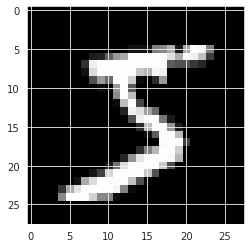

In [5]:
single_img = X_train[0]
plt.imshow(single_img, cmap = 'gray')
plt.show()

In [6]:
y_train[0] #label for above image

5

## **Data preprocessing**

In [7]:
from tensorflow.keras.utils import to_categorical

Making labels as OneHot vectors

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Scaling the dataset from [0, 1]

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Reshaping the dataset 

In [10]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

## **GPU check**

In [11]:
device = tf.test.gpu_device_name()
if device != '/device:GPU:0':
  raise SystemError('GPU device not found')
print(f'Device found at {device}')

Device found at /device:GPU:0


## **Building model**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
import time

In [14]:
early_stop = EarlyStopping(    # to monitor the growth of validation loss
    monitor = 'val_loss',
    mode = 'min',
    patience = 2
)

with tf.device('/gpu:0'):
  model = Sequential([
                      Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
                      MaxPool2D(pool_size = (2, 2)),

                      Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
                      MaxPool2D(pool_size = (2, 2)),

                      Flatten(),

                      Dense(units = 128, activation = 'relu'),
                      Dropout(rate = 0.2),

                      Dense(units = 10, activation = 'softmax')
  ])
  print('Model Built Success!')

  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['accuracy']
  )

  stime = time.time() # starting time 

  model.fit(
      x = X_train,
      y = y_train,
      batch_size = 128,
      epochs = 25,
      validation_data = (X_test, y_test),
      callbacks = [early_stop]
  )

  ftime = time.time() # finishing time
  ttime = ftime - stime

  print(f'\n\nModel Trained Successfully!. Time Taken : {round(ttime, 2)}s')

Model Built Success!
Epoch 1/25
469/469 [==============================] - 3s 5ms/step - loss: 0.2209 - accuracy: 0.9317 - val_loss: 0.0606 - val_accuracy: 0.9801
Epoch 2/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0657 - accuracy: 0.9797 - val_loss: 0.0371 - val_accuracy: 0.9870
Epoch 3/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0340 - val_accuracy: 0.9890
Epoch 4/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0293 - val_accuracy: 0.9901
Epoch 5/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0252 - val_accuracy: 0.9907
Epoch 6/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0251 - val_accuracy: 0.9914
Epoch 7/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0258 - val_ac

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

## **Model evaluation**

In [16]:
history = pd.DataFrame(model.history.history)
loss = history[['val_loss', 'loss']]
accuracy = history[['val_accuracy', 'accuracy']]

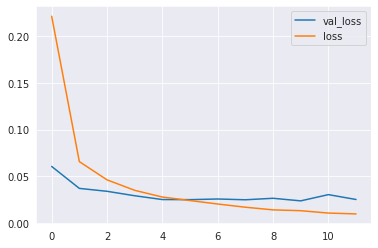

In [17]:
loss.plot()

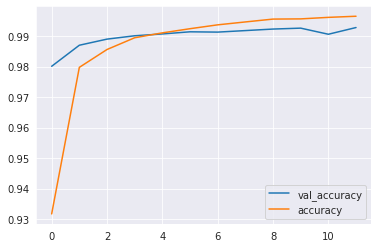

In [18]:
accuracy.plot()